In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

### Data

In [2]:
# Set Random Seed
np.random.seed(0)

# Generate Data
position = 0
velocity = 100
altitude = 1000
dt = 0.05

num = 400
mea_dis = []
mea_pos = []
mea_vel = []
mea_alt = []
for i in range(num):
    v = velocity + 5 * np.random.randn()
    a = altitude + 10 * np.random.randn()
    p = position + velocity * dt
    d = np.sqrt(np.square(a) + np.square(p)) + p * 0.05 * np.random.randn()
    mea_dis.append(d)
    mea_pos.append(p)
    mea_vel.append(v)
    mea_alt.append(a)
    position = p

### Run

In [3]:
def predict(x, dt=0.05):
    A = np.eye(3) + dt*np.array([[0, 1, 0],
                                 [0, 0, 0], 
                                 [0, 0, 0]])     
    return np.dot(A, x)

def measure(x):
    return np.sqrt(x[0]**2+x[2]**2)

x = np.array([0.0, 90.0, 1100.0])

eps = 1e-7
Npt = 1000
pt = x.reshape(-1, 1) + 0.5 * x.reshape(-1, 1) * np.random.randn(1, Npt)
wt = np.ones((1, Npt)) / Npt

est_dis = []
est_pos = []
est_vel = []
est_alt = []
for z in mea_dis:   
    pt = predict(pt) + np.random.randn(*pt.shape)
    W = norm.pdf(z, measure(pt), 100).reshape(1, -1)
    W = W / np.sum(W)
    x = np.dot(pt, W.T)
    idx = np.random.choice(Npt, size=Npt, p=W[0], replace=True)
    pt = pt[:, idx]
    
    est_dis.append(measure(x))
    est_pos.append(x[0, 0])
    est_vel.append(x[1, 0])
    est_alt.append(x[2, 0])

### Graph

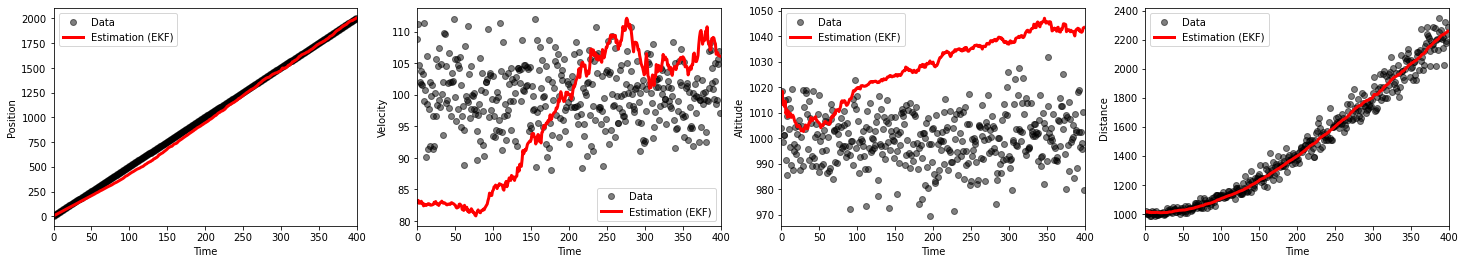

In [4]:
plt.figure(figsize=(25, 4))

plt.subplot(1, 4, 1)
plt.plot(mea_pos, 'o', alpha=0.5, color='k', label='Data')
plt.plot(est_pos, lw=3, color='r', label='Estimation (EKF)')
plt.legend()
plt.xlim(0, num)
plt.xlabel('Time')
plt.ylabel('Position')

plt.subplot(1, 4, 2)
plt.plot(mea_vel, 'o', alpha=0.5, color='k', label='Data')
plt.plot(est_vel, lw=3, color='r', label='Estimation (EKF)')
plt.legend()
plt.xlim(0, num)
plt.xlabel('Time')
plt.ylabel('Velocity')

plt.subplot(1, 4, 3)
plt.plot(mea_alt, 'o', alpha=0.5, color='k', label='Data')
plt.plot(est_alt, lw=3, color='r', label='Estimation (EKF)')
plt.legend()
plt.xlim(0, num)
plt.xlabel('Time')
plt.ylabel('Altitude')

plt.subplot(1, 4, 4)
plt.plot(mea_dis, 'o', alpha=0.5, color='k', label='Data')
plt.plot(est_dis, lw=3, color='r', label='Estimation (EKF)')
plt.legend()
plt.xlim(0, num)
plt.xlabel('Time')
plt.ylabel('Distance')

plt.show()